# File \[*queue*\]

Une file est «conteneur» assujetti à la displine **Premier entré, Premier sorti** (*First In, First Out* abrégé en **FIFO**).

On peut se la représenter comme un *tube à deux bouts*: 
- **Enfiler** \[*enqueue*\] consiste à insérer une donnée par une extrémité,
- **Défiler** \[*dequeue*\] consiste à enlever (et récupérer) une donnée à l'**autre** extrémité.

Son interface doit prévoir au minimum (en plus d'un constructeur):
- `enfiler(valeur)`: insère une valeur à une extrémité de la file,
- `defiler()`: renvoie et supprime la valeur située à son autre extrémité.

On ajoute souvent un attribut `voir` accessible en lecture seule permettant de récupérer la valeur en sortie de file et un moyen pour obtenir le nombre d'éléments dans la file.

## Implémentations

### Le type `deque` de Python

Les `list`(s) de Python ne sont pas adaptées pour implémenter une **file** ... Pour quelle raison?

L'insertion et la suppression en **début** de `list` sont des opérations de complexité $O(n)$ (temps proportionnel aux nombres d'éléménts stockés dans la liste).

Pour cette raison, Python propose dans sa librairie standard le module `collections`. Celui-ci contient le type `deque` (file «double») dont les opérations d'insertion ou de suppression aux deux bouts se font en temps constant $O(1)$.

Pour l'utiliser: `from collections import deque`.

On peut, entre autre chose (*interface*):
- construire une «deque» vide: `f = deque()`,
- «enfiler» une valeur avec: `f.append(valeur)`,
- et «défiler» (en récupérant la valeur) avec: `v = f.popleft()`.

Ou bien (raison pour laquelle on parle de file double) enfiler avec `appendleft(valeur)` et «défiler» avec `pop`.

Y'a qu'à choisir son côté. Tester!

In [ ]:
# À TESTER

**Un exemple**

In [ ]:
from collections import deque

f = deque()
for i in range(3):
    f.append(i) # pour enfiler
print(f"état de la file f: {f}")
v = f.popleft() # pour defiler
print(f"valeur défilée: {v}")
print(f"état de la file après défilement {f}")
print(f"est-ce une liste? {type(f) is list}")
print(f"est-ce une «deque» (file double)? {type(f) is deque}")

### avec une liste chaînée

On enfile en insérant la valeur en queue (réfléchir) et on défile en supprimant la tête. Ces opérations sont très efficaces pourvues que la liste possède une propriété `queue` permettant de récupérer simplement la dernière cellule de la liste...

On réutilise le type `Liste` dont l'interface a été décrite plus tôt (voir pile).

In [ ]:
from liste import Liste

class File:
    def __init__(self):
        self.__liste = Liste()
    def est_vide(self):
        return len(self.__liste) == 0
    def enfiler(self, valeur):
        pass
    def defiler(self):
        pass
    def __len__(self):
        return len(self.__liste)
    def __str__(self):
        return str(self.__liste.tete)    

In [ ]:
f = File()
f.enfiler(1)
f.enfiler(2)
print(f)
assert f.defiler() == 1
f.enfiler(3)
f.enfiler(4)
f.enfiler(5)
assert len(f) == 4
print(f)

**Solution**

In [ ]:
from liste import Liste

class File:
    def __init__(self):
        self.__liste = Liste()
    def est_vide(self):
        return len(self.__liste) == 0
    def enfiler(self, valeur):
        queue = self.__liste.queue
        self.__liste.inserer_apres(valeur, queue) # pas de return ici!
    def defiler(self):
        ret = self.__liste.tete.valeur
        self.__liste.supprimer_apres()
        return ret 
    def __len__(self):
        return len(self.__liste)
    def __str__(self):
        return str(self.__liste.tete)    

Avez-vous une idée de comment on pourrait obtenir une «file double» (aussi efficace aux deux extrémités) avec une liste chaînée?

En utilisant une liste doublement chaînée: la suppression en queue serait simple car il serait possible de «remonter» à la cellule précédente...

### avec un «vrai» tableau

C'est nécessaire pour certains langages et la stratégie est intéressante.

Dans les grandes ligne, on utilise deux pointeurs `entree`, `sortie` sur des positions du tableau (de taille fixe). Si on suppose que la sortie est à «gauche» et l'entrée à «droite»:
- `enfiler(valeur)`: on place valeur dans le tableau à la position `entree` et on avance `entree` d'un cran si il y a de la place sinon on le fait redémarrer en début de tableau (voir cas **4.**),
- `defiler()`: on récupère la valeur à la position `sortie` puis on décale `sortie` d'un cran vers la droite. Même stratégie si on arrive en bout de tableau.

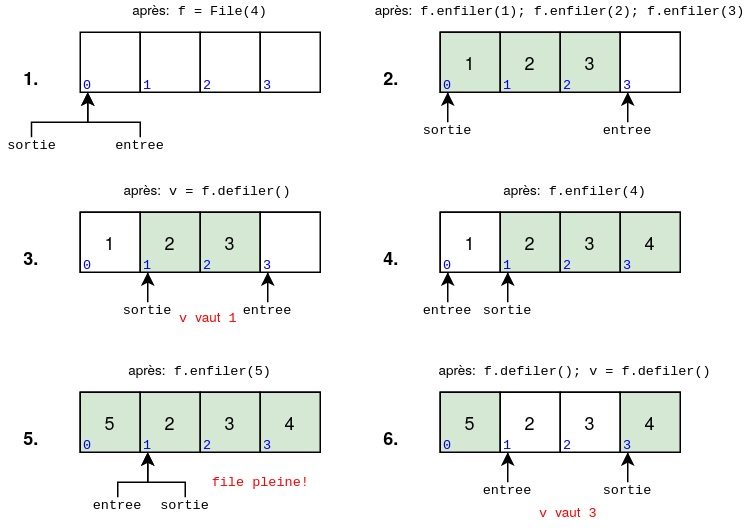

Comment s'aperçoit-on que la file est pleine?

Lorsque, au moment d'enfiler une valeur, `entree + 1` est égal à `sortie`, la valeur est bien enfilée mais la file doit être marquée pleine. En effet si `entree` et `sortie` coincide, la file peut tout aussi bien être pleine que vide!

À vous de jouer!

In [ ]:
class File:
    def __init__(self, taille=2**10):
        self.__tableau = [None] * taille
        self.__entree = 0
        self.__sortie = 0
        self.__pleine = False
    def est_vide(self):
        pass
    def enfiler(self, valeur):
        if ___:
            raise IndexError("File pleine!")
        pass
    def defiler(self):
        if ___:
            raise IndexError("File vide!")
        pass
    def __len__(self):
        pass
    def __str__(self):
        return str(self.__tableau)

Pour tester

In [ ]:
f = File(4)
f.enfiler(1)
f.enfiler(2)
print(f)
assert f.defiler() == 1
f.enfiler(3)
f.enfiler(4)
f.enfiler(5)
assert len(f) == 4
print(f)
assert f.defiler() == 2 and f.defiler() == 3
print(f)
assert len(f) == 2
# bien sûr il faudrait améliorer l'affichage...

**Solution**

In [ ]:
class File:
    def __init__(self, taille=2**10):
        self.__tableau = [None] * taille
        self.__entree = 0
        self.__sortie = 0
        self.__pleine = False
    def est_vide(self):
        return self.__entree == self.__sortie
    def enfiler(self, valeur):
        if self.__pleine:
            raise IndexError("File pleine!")
        if (self.__entree + 1) % len(self.__tableau) == self.__sortie:
            self.__pleine = True
        self.__tableau[self.__entree] = valeur
        self.__entree = (self.__entree + 1) % len(self.__tableau)
    def defiler(self):
        if not self.__pleine and self.__entree == self.__sortie:
            raise IndexError("File vide!")
        if self.__pleine:
            self.__pleine = False
        ret = self.__tableau[self.__sortie] 
        self.__sortie = (self.__sortie + 1) % len(self.__tableau)
        return ret
    def __len__(self):
        if self.__entree > self.__sortie:
            return self.__entree - self.__sortie
        else:
            return self.__entree + (len(self.__tableau) - self.__sortie)
    def __str__(self):
        return str(self.__tableau)

**Note**: observez que `entree` et `sortie` sont conventionnelles et qu'il ne serait pas difficile d'échanger leurs rôles pour obtenir une file «double» (aussi efficace aux deux extremités).

## Applications - Exercices

### 1 - Implémenter une file avec deux piles

Tout est dans le titre. On ne recherche pas l'efficacité.

Utiliser de simples listes - en vous limitant à `append`, `pop` et éventuellement `...[-1]` - pour vos piles.

*aide*: L'idée est de faire transiter les éléments de la pile pour l'entrée vers la pile pour sortie **aux moments opportuns** - dessiner! 

In [ ]:
# VOTRE CODE ICI
class File:
    pass

In [14]:
f = File()
for i in range(5):
    f.enfiler(i)
v1 = f.defiler(); v2 = f.defiler()
f.enfiler(10)
assert v1 == 0 and v2 == 1 and len(f) == 4

**Solution**

In [13]:
class File:
    def __init__(self):
        self.__entree = []  # pile d'entrée
        self.__sortie = []  # pile de sortie
    
    def enfiler(self, valeur):
        self.__entree.append(valeur)
    
    def defiler(self):
        if len(self) == 0:
            raise IndexError("File vide!")
        
        # si sortie n'est pas vide le premier entrée est au sommet
        if len(self.__sortie):
            return self.__sortie.pop()
        
        Ne = len(self.__entree)
        # si entree n'a qu'un élément, on peut le sortir directement
        if Ne == 1:
            return self.__sortie.pop()

        # la sortie est vide et l'entrée contient deux éléments ou plus
        # copions entree dans sortie (sauf le dernier élément)
        for _ in range(Ne-1):
            self.__sortie.append(self.__entree.pop())
        
        # le dernier est le premier entrée donc c'est lui qui sort:
        return self.__entree.pop()
    
    def __len__(self):
        return len(self.__entree) + len(self.__sortie)

### 2 - Gestion des événements

Lorsque l'utilisateur interagit avec l'ordinateur (clavier, souris, ...), il produit des événements qui déclenchent ce qu'on appelle couramment des **interruptions**.

Lorqu'une *interruption* survient, le *système d'exploitation* reprend alors «la main» - c'est-à-dire le contrôle du processeur - pour la gérer.

Notamment, il «prévient» tous les programmes qui se sont déclarés «intéressés» par tel ou tel type d'événement.

Mais il y a un hic: 

> ce changement de contexte *peut avoir lieu plusieurs fois* avant qu'un certain programme puisse être à nouveau exécuté. 

Comment dès lors être sûr qu'un tel programme recevra correctement la notification des événements survenus pendant son «sommeil»?

En s'assurant que le système d'exploitation «enfile» l'événement dans une file propre au programme.

Pour simuler cette situation, nous utiliserons le module `threading` de Python. Vous pouvez assimilez un **thread** à une sorte de programme autonome.

Pour «définir» un **thread**, on peut réaliser une classe qui **hérite** de la classe `Thread`. 

Il suffit alors de mettre le code principal du programme dans la méthode `run` de cette classe.

Ensuite, on construit une instance et on «lance» le thread en appelant sa méthode `start()`.

Voici un exemple:

In [ ]:
# Exécuter moi plusieurs fois et bien observer l'affichage. 
from threading import Thread
from time import sleep
from random import random

class Test(Thread):
    def __init__(self, num):
        super().__init__() # appel de l'init de la classe mère Thread
        self.num = num
    def run(self):
        # code principal du «thread»
        i = 3
        while i > 0:
            sleep(random()) # pour ralentir un peu: random() -> float de ]0;1[
            print(f"je suis le thread n°{self.num}")
            i -= 1

t1, t2 = Test(1), Test(2)
t1.start()
t2.start()

Nous allons produire deux sortes de *thread*: 
- un pour simuler l'os instance de `Superviseur`,
- l'autre pour simuler un programme comme instance de `Programme`.

Voici le code de Superviseur:

In [ ]:
from threading import Thread
from random import randint, choice
from time import sleep
from collections import deque # ou from liste import Liste puis adapter

class Superviseur(Thread):
    EVENTS = ["souris", "clavier", "autre"]
    def __init__(self):
        super().__init__() # appel du «constructeur» de la classe mère
        self._mems = []
        self.max = 10 # 10 événements aléatoires avant extinction.
    def register(self, mem):
        """Permet à un programme d'indiquer qu'il souhaite recevoir les événements
        mem est une structure de donnée adaptée au problème...
        """
        self._mems.append(mem)
    def run(self):
        while self.max > 0:
            sleep(randint(1, 10)/10) # ralentir
            event = choice(Superviseur.EVENTS)
            self.max -= 1
            print(f"superviseur: {event}")
            for mem in self._mems:
                # avertir le programme ayant fourni «mem» de l'événement
                mem.append(event)

À vous de jouer!

In [ ]:
class Programme(Thread):
    def __init__(self, superviseur):
        super().__init__()
        self.evts = ___
        self.timeout = 5
        superviseur.register(___)
    def run(self):
        sleep(1)
        while self.timeout > 0:
            sleep(randint(1, 10)/8)
            if len(self.file_evts) > 0:
                # récupérer l'événement
                evt = ___
                print(f"prog: {evt}")
            else:
                self.timeout -= 1

Vérifions que tout se passe bien: le programme doit (1) recevoir les événements et (2) dans l'ordre où ils ont été émis par le superviseur (bien que l'exécution du programme et du superviseur puisse avoir lieu en des temps différents)

In [ ]:
s = Superviseur()
prog = Programme(s)
s.start()
prog.start()

**Solution**

In [ ]:
class Programme(Thread):
    def __init__(self, superviseur):
        super().__init__()
        self.evts = deque()
        self.timeout = 5
        superviseur.register(self.evts)
    def run(self):
        sleep(1)
        while self.timeout > 0:
            sleep(randint(1, 10)/8)
            if len(self.evts) > 0:
                # récupérer l'événement
                evt = self.evts.popleft()
                print(f"prog: {evt}")
            else:
                self.timeout -= 1